# How to Benchmark Optimization Algorithms

Benchmarking optimization algorithms is an important step when developing a new algorithm or when searching for a algorithm that is good at solving a particular problem. 

In general, benchmarking constists of the following steps:

- Defining the test problems (or getting pre-implemented ones)
- Defining the optimization algorithms and the tuning parameters you want to try
- Running the benchmark
- Plotting the results. 

## Get Test Problems

Estimagic includes the problems of [Moré and Wild (2009)](https://epubs.siam.org/doi/pdf/10.1137/080724083) by default.

Each problem consist of the `inputs` (the criterion function and the start parameters) and the `solution` (the optimal parameters and criterion value).

Below we load the Moré and Wild problems and look at one Rosenbrock problem with difficult start parameters.

In [1]:
from estimagic.examples.benchmarking import get_problems

problems = get_problems("more_wild")

keep = [
    "rosenbrock_bad_start",
    "helical_valley_bad_start",
    "powell_singular_good_start",
    "brown_dennis_bad_start",
    "linear_rank_one_zero_columns_rows_bad_start",
    "watson_12_good_start",
    "bard_good_start",
    "kowalik_osborne",
    "brown_almost_linear",
    "osborne_one",
    "osborne_two_good_start",
    "bdqrtic_8",
    "bdqrtic_10",
    "bdqrtic_11",
    "bdqrtic_12",
    "cube_5",
    "cube_6",
    "cube_8",
]
print("\n".join(problems.keys()))
problems = {name: prob for name, prob in problems.items() if name in keep}

linear_full_rank_good_start
linear_full_rank_bad_start
linear_rank_one_good_start
linear_rank_one_bad_start
linear_rank_one_zero_columns_rows_good_start
linear_rank_one_zero_columns_rows_bad_start
rosenbrock_good_start
rosenbrock_bad_start
helical_valley_good_start
helical_valley_bad_start
powell_singular_good_start
powell_singular_bad_start
freudenstein_roth_good_start
freudenstein_roth_bad_start
bard_good_start
bard_bad_start
kowalik_osborne
meyer
watson_6_good_start
watson_6_bad_start
watson_9_good_start
watson_9_bad_start
watson_12_good_start
watson_12_bad_start
box_3d
jennrich_sampson
brown_dennis_good_start
brown_dennis_bad_start
chebyquad_6
chebyquad_7
chebyquad_8
chebyquad_9
chebyquad_10
chebyquad_11
brown_almost_linear
osborne_one
osborne_two_good_start
osborne_two_bad_start
bdqrtic_8
bdqrtic_10
bdqrtic_11
bdqrtic_12
cube_5
cube_6
cube_8
mancino_5_good_start
mancino_5_bad_start
mancino_8
mancino_10
mancino_12_good_start
mancino_12_bad_start
heart_eight_good_start
heart_eight_b

## Specifying the Optimizers

An optimizer consists of the algorithm name and its `algo_options`. 

Below, we compare a strict version of the L-BFGS-B with all available algorithms at their default.

In [2]:
optimizers = {
    "L-BFGS-B": {"algorithm": "scipy_lbfgsb"},
    "Nelder-Mead": {
        "algorithm": "scipy_neldermead",
        "algo_options": {"stopping_max_iterations": 1000},
    },
    "Fides": {"algorithm": "fides"},
    "Bobyqa": {
        "algorithm": "nlopt_bobyqa",
        "algo_options": {"stopping_max_criterion_evaluations": 1000},
    },
    "TNC": {
        "algorithm": "scipy_truncated_newton",
        "algo_options": {"stopping_max_criterion_evaluations": 500},
    },
}

print(len(optimizers), len(problems))

5 18


## Running the Benchmark

Once you have your problems and your optimizers, you can simply use `run_benchmark`. The results are a dictionary with one entry for each (problem, algorithm) combination. Each entry not only saves the the solution but also the history of the algorithm's criterion and parameter history. 

In [3]:
from estimagic.examples.benchmarking import run_benchmark

results = run_benchmark(
    problems,
    optimizers,
    logging_directory="benchmark_logs",
    n_cores=4,
)

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/python3.8/site-packages/fides/minimize.py:598: RuntimeWarning: invalid value encountered in multiply
  bounds = ((1 + v)*self.lb + (1 - v)*self.ub)/2
/home/klara/anaconda3/envs/estimagic/lib/pyth

## Visualizing the Results

Once you have your results, you can easily visualize the results. 

estimagic provides two types of plots: Convergence Plots and Data Profile Plots. 
Each serves a different purpose. 

To see how optimizers fared on particular problems, the **Convergence Plots** are useful. They are similar to the convergence plots you know from the dashboard but show you the trajectories of different optimizers in one plot. 

To compare optimizers over the whole problem set, use the **Data Profile Plots** proposed by [Moré and Wild (2009)](https://epubs.siam.org/doi/pdf/10.1137/080724083). 

We show how to create each plot and explain how to interpret them below.

### Convergence Plots for Comparing Optimizers 

Below we show how fast different optimizers converged on a few of our problems. 

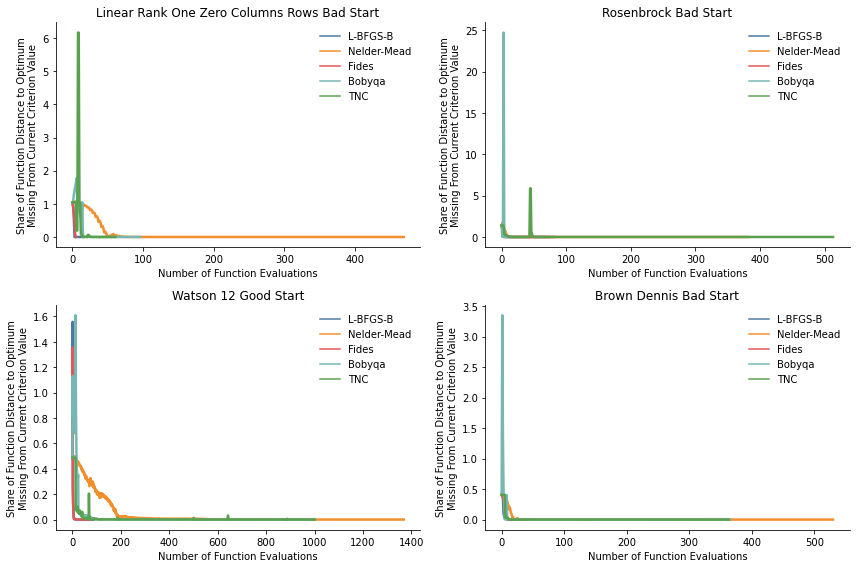

In [4]:
import numpy as np

from estimagic.visualization.convergence_plot import convergence_plot

# create subsets to visualize
problems_to_show = [
    "brown_dennis_bad_start",
    "linear_rank_one_zero_columns_rows_bad_start",
    "rosenbrock_bad_start",
    "watson_12_good_start",
]
problem_subset = {
    name: problem for name, problem in problems.items() if name in problems_to_show
}
result_subset = {tup: res for tup, res in results.items() if tup[0] in problems_to_show}

fig, axes = convergence_plot(
    problems=problem_subset,
    results=result_subset,
    n_cols=2,
    distance_measure="criterion",
    monotone=False,
    normalize=True,
    runtime_measure="n_evaluations",
    stopping_criterion=None,
    x_precision=None,
    y_precision=0.01,
)

The first thing that stands out is that L-BFGS-B strongly outperforms Nelder-Mead on every problem we are looking at.

The second thing we can observe is that the two L-BFGS-B optimizers lie exactly on top of each other. This is not very surprising because our required precision (99% of the distance from the start to the target criterion value must be covered by the optimizer) here is quite large. Therefore, the standard L-BFGS-B algorithm already terminates after it is sufficiently close to the true solution and the two lines are exactly 

### Comparing Optimizer Performance Over the Whole Problem Set

Data profiles answer the question: What percentage of problems can each algorithm solve within a certain runtime budget relative to the best algorithm on each problem?

The runtime budget is plotted on the x axis and given in multiples of the best
performing algorithm's required runtime to solve each problem.

Below you can see the for the different optimizers on our problem set:

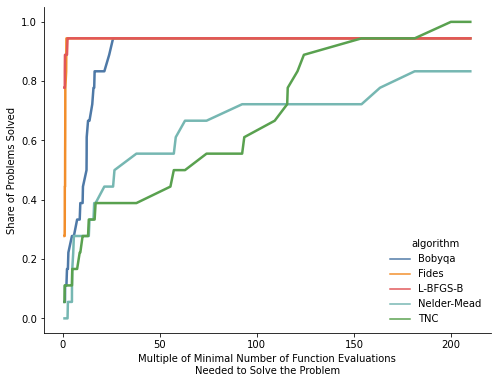

In [5]:
from estimagic.visualization.profile_plot import profile_plot

fig, ax = profile_plot(
    problems=problems,
    results=results,
    runtime_measure="n_evaluations",
    y_precision=1e-3,
)

#### How to Interpret the Data Profile Plot

Aggregating over all problems, we can see that the pattern we saw in the Convergence Plots holds more generally: L-BFGS-B strongly outperforms Nelder-Mead. Only being willing to wait 3000 times the fastest algorithm's 

However, there are some problems which neither L-BGFS-B nor Nelder-Mead can solve since neither of them reaches 1.0. 

Let's look at a table giving us their performance, to explore which problems these are:

In [6]:
from estimagic.examples.process_benchmark_results import create_performance_df

df, converged_info = create_performance_df(
    problems=problems,
    results=results,
    stopping_criterion="y",
    y_precision=1e-3,
    x_precision=None,
)

converged_info  # [~converged_info.all(axis=1)]

algorithm,Bobyqa,Fides,L-BFGS-B,Nelder-Mead,TNC
problem,,,,,
bard_good_start,True,True,True,True,True
bdqrtic_10,True,True,True,True,True
bdqrtic_11,True,True,True,False,True
bdqrtic_12,True,True,True,True,True
bdqrtic_8,True,True,True,True,True
brown_almost_linear,True,True,True,False,True
brown_dennis_bad_start,True,True,True,True,True
cube_5,True,True,True,True,True
cube_6,True,True,True,True,True


Looking at the info on convergence we can see that there are two problems (*freudenstein_roth_good_start* and *osborne_two_bad_start*) which no optimizer was able to solve. L-BFGS-B alone solved *brown_almost_linear_medium* and only Nelder-Mead was able to solve *jennrich_sampson* and *osborne_one* which is why it was able to overtake  L-BFGS-B on the very right in the data profile plot above. 